In [272]:
# Libraries
import pandas as pd
import pingouin as pg
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.formula.api import ols

from scipy.stats.stats import pearsonr
from scipy import stats
from scipy.stats import f_oneway



pd.options.mode.chained_assignment = None  # default='warn'

### 1. Load Data

In [273]:
data = pd.read_csv('dataset.csv')

In [274]:
data

,Χρονική σήμανση,1. Φύλο:,2. Ηλικιακή ομάδα:,3. Επίπεδο εκπαίδευσης:,1. Ποιος είναι ο τίτλος ή η θέση εργασίας σας;,2. Ποιο είναι το μέγεθος της εταιρείας ή του οργανισμού στον οποίο εργάζεστε;,3. Πόσα έτη εργασιακής εμπειρίας έχετε στον τρέχοντα κλάδο απασχόλησης σας;,4. Ποιο είναι το τρέχον καθαρό μηνιαίο εισόδημά σας;,1. Ποια είναι η οικογενειακή σας κατάσταση;,2. Έχετε παιδιά;,...,3. Πιστεύετε ότι τα στερεότυπα των φύλων έχουν επηρεάσει τις ευκαιρίες επαγγελματικής σας εξέλιξης ή τις αναθέσεις εργασίας σας;,4. Έχετε υποστεί ποτέ παρενόχληση ή διάκριση με βάση τα στερεότυπα του φύλου στο χώρο εργασίας;,1. Έχετε αισθανθεί ποτέ αδικία ή διάκριση κατά τη διαδικασία πρόσληψης βάση παραγόντων όπως το φύλο;,2. Έχει υποπέσει ποτέ στην αντίληψη σας ότι κάποιος υφίσταται αδικία ή διάκριση κατά τη διάρκεια της διαδικασίας πρόσληψης λόγω φύλου;,3. Πιστεύετε ότι υπάρχουν προκαταλήψεις στη διαδικασία πρόσληψης που πλήττουν ορισμένες ομάδες ανθρώπων;,4. Σας έχουν κάνει ποτέ ακατάλληλες ή αδιάκριτες ερωτήσεις κατά τη διάρκεια μιας συνέντευξης για δουλειά;,1. Πιστεύετε ότι σήμερα υπάρχει ισότητα μεταξύ των φύλων στον εργασιακό σας χώρο;,"2. Αν όχι, σε ποιον κλάδο το εντοπίζετε και γιατί;","3. Αν όχι, ποιες ενέργειες θα καθιστούσαν δυνατή τη βελτίωση;",4. Κατά την άποψη σας αναφορικά με την ισότητα των φύλων που θα κατατάσσατε την Ελλάδα συγκριτικά με τα υπόλοιπα κράτη - μέλη της Ευρωπαϊκής Ένωσης;
0,28/04/2023 7:07:25 μ.μ.,Γυναίκα,18 - 25,"Πανεπιστημιακή εκπαίδευση (ΑΕΙ, ΤΕΙ)",Διοικητικός υπάλληλος,Μεγάλη επιχείρηση,0 - 5 έτη,1300,Άγαμος,Όχι,...,1,Όχι,Όχι,4.0,4.0,Όχι,Ναι,NaN,NaN,4.0
1,28/04/2023 7:10:08 μ.μ.,Γυναίκα,18 - 25,"Πανεπιστημιακή εκπαίδευση (ΑΕΙ, ΤΕΙ)",Διοικητικός υπάλληλος,Μικρή επιχείρηση,0 - 5 έτη,600,Άγαμος,Όχι,...,1,Όχι,Όχι,4.0,3.0,Όχι,Ναι,NaN,NaN,3.0
2,28/04/2023 7:22:55 μ.μ.,Γυναίκα,18 - 25,"Πανεπιστημιακή εκπαίδευση (ΑΕΙ, ΤΕΙ)",Διοικητικός υπάλληλος,Μεγάλη επιχείρηση,0 - 5 έτη,680,Άγαμος,Όχι,...,4,Όχι,Όχι,4.0,4.0,Όχι,Όχι,Κλάδοι που στερεοτυπικά αφορούν άντρες παραμέν...,Σίγουρα αλλάγη των απαρχαιωμένων αντιλήψεων κα...,3.0
3,28/04/2023 7:29:54 μ.μ.,Γυναίκα,25 - 35,"Μεταπτυχιακή εκπαίδευση (MSc, PhD)",Διοικητικός υπάλληλος,Μεγάλη επιχείρηση,0 - 5 έτη,3000,Άγαμος,Όχι,...,2,Όχι,Ναι,5.0,5.0,Όχι,Ναι,NaN,NaN,3.0
4,28/04/2023 7:42:42 μ.μ.,Άνδρας,18 - 25,"Πανεπιστημιακή εκπαίδευση (ΑΕΙ, ΤΕΙ)",Άλλο,Μικρή επιχείρηση,0 - 5 έτη,910,Άγαμος,Όχι,...,3,Ναι,Όχι,4.0,4.0,Όχι,Όχι,NaN,NaN,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,30/04/2023 5:04:35 μ.μ.,Γυναίκα,18 - 25,"Πανεπιστημιακή εκπαίδευση (ΑΕΙ, ΤΕΙ)",Διοικητικός υπάλληλος,Μεγάλη επιχείρηση,0 - 5 έτη,1500 - 2000,Άγαμος,Όχι,...,2,Όχι,Όχι,2.0,4.0,Όχι,Ναι,NaN,NaN,2.0
64,30/04/2023 6:03:25 μ.μ.,Γυναίκα,25 - 35,"Πανεπιστημιακή εκπαίδευση (ΑΕΙ, ΤΕΙ)",Διοικητικός υπάλληλος,Μεγάλη επιχείρηση,0 - 5 έτη,800-1000,Έγγαμος,Όχι,...,4,Όχι,Ναι,3.0,5.0,Ναι,Ναι,NaN,NaN,3.0
65,30/04/2023 7:22:17 μ.μ.,Άνδρας,25 - 35,"Μεταπτυχιακή εκπαίδευση (MSc, PhD)",Διοικητικός υπάλληλος,Μεγάλη επιχείρηση,5 - 10 έτη,1500 - 2000,Άγαμος,Όχι,...,2,Όχι,Όχι,4.0,3.0,Όχι,Ναι,NaN,NaN,3.0
66,02/05/2023 8:58:44 π.μ.,Άνδρας,25 - 35,"Μεταπτυχιακή εκπαίδευση (MSc, PhD)",Άλλο,Μεγάλη επιχείρηση,0 - 5 έτη,1000-1500,Άγαμος,Όχι,...,5,Όχι,Όχι,1.0,4.0,Όχι,Ναι,NaN,NaN,3.0


### 2.Clean Data

In [275]:
#helper functions

def converter_noyes_to_numbers(table, q):
    for index in range(len(table)):
        if table[q].iloc[index] == '΄Οχι':
            table[q].iloc[index] = 5
        elif table[q].iloc[index] == 'Ναι':
            table[q].iloc[index] = 1
        elif table[q].iloc[index] == 'Όχι':
            table[q].iloc[index] = 5

    return table

def my_reverse(table, q):
    for index in range(len(table)):
        if table[q].iloc[index] == 1:
            table[q].iloc[index] = 5
        elif table[q].iloc[index] == 2:
            table[q].iloc[index] = 4
        elif table[q].iloc[index] == 4:
            table[q].iloc[index] = 2
        elif table[q].iloc[index] == 5:
            table[q].iloc[index] = 1
    return table

In [276]:
q1 = '1. Έχετε αντιμετωπίσει ποτέ διακρίσεις στις αμοιβές με βάση το φύλο στην τρέχουσα ή σε προηγούμενη εργασία σας;'
q2 = '2. Σας έχει γίνει ποτέ αντιληπτό ότι το φύλο σας αποτελεί την κύρια αιτία για τις μισθολογικές διαφορές μεταξύ εσάς και των συναδέλφων σας για την πραγματοποίηση ίδιας εργασίας;'
q3 = '3. Πιστεύετε ότι υπάρχει διαφορά αμοιβών μεταξύ των φύλων στον κλάδο ή στον εργασιακό σας χώρο;'
q4 = '4. Πιστεύετε ότι ο οργανισμός που εργάζεστε εφαρμόζει τις απαραίτητες ενέργειες για την αντιμετώπιση των μισθολογικών διαφορών μεταξύ των φύλων;'

q5 = '1. Έχετε αισθανθεί ποτέ ότι υπάρχει ένα εμπόδιο που σας εμποδίζει να προχωρήσετε στις υψηλόβαθμες θέσεις στον εργασιακό σας χώρο με βάση παράγοντες όπως το φύλο; (π.χ. μητρότητα/πατρότητα, μυϊκή δύναμη κτλ.)'
q6 = '2. Πιστεύετε ότι ο χώρος εργασίας σας έχει μια ηγετική ομάδα που αντιπροσωπεύει διαφορετικά φύλα και υπόβαθρα;'
q7 = '3. Πιστεύετε ότι ο χώρος εργασίας σας έχει δίκαιες και διαφανείς διαδικασίες πρόσληψης και προαγωγής που είναι απαλλαγμένες από διακρίσεις που αφορούν στο φύλο;'
q8 = '4. Πιστεύετε ότι υπάρχει το φαινόμενο της γυάλινης οροφής (Glass Ceiling) στον κλάδο ή τον χώρο εργασίας σας;  '

q9 = '1. Έχετε βιώσει ποτέ στερεοτυπικά σχόλια αναφορικά με το φύλο σας στον χώρο εργασίας;'
q10 = '2. Έχετε αισθανθεί ποτέ ότι στερεότυπα για το φύλο επηρεάζουν κάποιον άλλο στο χώρο εργασίας;'
q11 = '3. Πιστεύετε ότι τα στερεότυπα των φύλων έχουν επηρεάσει τις ευκαιρίες επαγγελματικής σας εξέλιξης ή τις αναθέσεις εργασίας σας;'
q12 = '4. Έχετε υποστεί ποτέ παρενόχληση ή διάκριση με βάση τα στερεότυπα του φύλου στο χώρο εργασίας; '

q13 = '1. Έχετε αισθανθεί ποτέ αδικία ή διάκριση  κατά τη διαδικασία πρόσληψης βάση παραγόντων όπως το φύλο;'
q14 = '2. Έχει υποπέσει ποτέ στην αντίληψη σας ότι κάποιος υφίσταται αδικία ή διάκριση κατά τη διάρκεια της διαδικασίας πρόσληψης λόγω φύλου;'
q15 = '3. Πιστεύετε ότι υπάρχουν προκαταλήψεις στη διαδικασία πρόσληψης που πλήττουν ορισμένες ομάδες ανθρώπων;'
q16 = '4. Σας έχουν κάνει ποτέ ακατάλληλες ή αδιάκριτες ερωτήσεις κατά τη διάρκεια μιας συνέντευξης για δουλειά; '

q17 = '1. Πιστεύετε ότι σήμερα υπάρχει ισότητα μεταξύ των φύλων στον εργασιακό σας χώρο; '
q18 = '4. Κατά την άποψη σας αναφορικά με την ισότητα των φύλων που θα κατατάσσατε την Ελλάδα συγκριτικά με τα υπόλοιπα κράτη - μέλη της Ευρωπαϊκής Ένωσης;'



paying_gap = data[:][[q1,q2,q3, q4]]
glass_ceiling = data[:][[q5,q6,q7, q8]]
gender_descrimination = data[:][[q9,q10,q11, q12]]
descrimination_recruitment = data[:][[q13,q14,q15, q16]]
overall_picture = data[:][[q17,q18]]


#### Reverse , No or Yes questiones to numbers

In [277]:
paying_gap = converter_noyes_to_numbers(paying_gap, q1)
glass_ceiling = converter_noyes_to_numbers(glass_ceiling, q5)
glass_ceiling = converter_noyes_to_numbers(glass_ceiling, q8)
gender_descrimination = converter_noyes_to_numbers(gender_descrimination, q9)
gender_descrimination = converter_noyes_to_numbers(gender_descrimination, q12)
descrimination_recruitment = converter_noyes_to_numbers(descrimination_recruitment, q13)
descrimination_recruitment = converter_noyes_to_numbers(descrimination_recruitment, q16)

In [278]:
## Reverse questiones
paying_gap = my_reverse(paying_gap,q2)
paying_gap = my_reverse(paying_gap,q3)

In [279]:
gender_descrimination =  my_reverse(gender_descrimination,q10)
gender_descrimination =  my_reverse(gender_descrimination,q11)

In [280]:
descrimination_recruitment = my_reverse(descrimination_recruitment, q14)
descrimination_recruitment = my_reverse(descrimination_recruitment, q15)

In [281]:
for column in paying_gap.columns:
    paying_gap[column] = pd.to_numeric(paying_gap[column], errors='coerce')

In [282]:
for column in glass_ceiling.columns:
    glass_ceiling[column] = pd.to_numeric(glass_ceiling[column], errors='coerce')

In [283]:
for column in gender_descrimination.columns:
    gender_descrimination[column] = pd.to_numeric(gender_descrimination[column], errors='coerce')

In [284]:
for column in descrimination_recruitment.columns:
    descrimination_recruitment[column] = pd.to_numeric(descrimination_recruitment[column], errors='coerce')

### 3. Cronabahs Alpha


In [285]:
#calculate cronabachs alpha
ca = pg.cronbach_alpha(data=paying_gap)
print("Cronabachs alpha for parameter 1: ",ca[0])

Cronabachs alpha for parameter 1:  0.6342599607626119


In [286]:
#calculate cronabachs alpha
ca = pg.cronbach_alpha(data=glass_ceiling)
print("Cronabachs alpha for parameter 1: ",ca[0])

Cronabachs alpha for parameter 1:  0.2981164272216562


In [287]:
#calculate cronabachs alpha
ca = pg.cronbach_alpha(data=gender_descrimination)
print("Cronabachs alpha for parameter 1: ",ca[0])

Cronabachs alpha for parameter 1:  0.6374918301094901


In [288]:
#calculate cronabachs alpha
ca = pg.cronbach_alpha(data=descrimination_recruitment)
print("Cronabachs alpha for parameter 1: ",ca[0])

Cronabachs alpha for parameter 1:  0.5133289847203947


### 4.Parameter Analysis

In [289]:
## Payng Gap 

relative_frequencies = paying_gap.apply(lambda x: x.value_counts(normalize=True))
relative_frequencies[q1].iloc[0] = relative_frequencies[q1].iloc[0]/3
relative_frequencies[q1].iloc[4] = relative_frequencies[q1].iloc[4]/3



In [290]:
relative_frequencies

,1. Έχετε αντιμετωπίσει ποτέ διακρίσεις στις αμοιβές με βάση το φύλο στην τρέχουσα ή σε προηγούμενη εργασία σας;,2. Σας έχει γίνει ποτέ αντιληπτό ότι το φύλο σας αποτελεί την κύρια αιτία για τις μισθολογικές διαφορές μεταξύ εσάς και των συναδέλφων σας για την πραγματοποίηση ίδιας εργασίας;,3. Πιστεύετε ότι υπάρχει διαφορά αμοιβών μεταξύ των φύλων στον κλάδο ή στον εργασιακό σας χώρο;,4. Πιστεύετε ότι ο οργανισμός που εργάζεστε εφαρμόζει τις απαραίτητες ενέργειες για την αντιμετώπιση των μισθολογικών διαφορών μεταξύ των φύλων;
1.0,0.044118,0.044118,0.117647,NaN
2.0,NaN,0.117647,0.250000,0.107692
3.0,NaN,0.176471,0.176471,0.292308
4.0,NaN,0.250000,0.191176,0.307692
5.0,0.289216,0.411765,0.264706,0.292308


/var/folders/q9/jvtr2p8s6sn6wt933mh1tyfm0000gn/T/ipykernel_70747/3551027262.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])


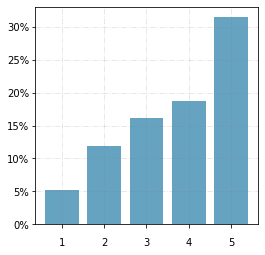

In [291]:

relative_frequencies_sum = relative_frequencies.sum(axis=1)/4
height = relative_frequencies_sum

bars = ('1', '2', '3', '4', '5')


# Figure Size
fig, ax= plt.subplots(figsize =(4, 4))


# Horizontal Bar Plot
ax.bar(bars, height,color=(0.0, 0.4, 0.6, 0.6))
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.9,
        alpha = 0.2)

    # Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 10)
ax.yaxis.set_tick_params(pad = 2)

vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])


plt.show()

In [292]:
height

1.0    0.051471
2.0    0.118835
3.0    0.161312
4.0    0.187217
5.0    0.314498
dtype: float64

In [293]:
paying_gap.describe()

,1. Έχετε αντιμετωπίσει ποτέ διακρίσεις στις αμοιβές με βάση το φύλο στην τρέχουσα ή σε προηγούμενη εργασία σας;,2. Σας έχει γίνει ποτέ αντιληπτό ότι το φύλο σας αποτελεί την κύρια αιτία για τις μισθολογικές διαφορές μεταξύ εσάς και των συναδέλφων σας για την πραγματοποίηση ίδιας εργασίας;,3. Πιστεύετε ότι υπάρχει διαφορά αμοιβών μεταξύ των φύλων στον κλάδο ή στον εργασιακό σας χώρο;,4. Πιστεύετε ότι ο οργανισμός που εργάζεστε εφαρμόζει τις απαραίτητες ενέργειες για την αντιμετώπιση των μισθολογικών διαφορών μεταξύ των φύλων;
count,68.000000,68.000000,68.000000,65.000000
mean,4.470588,3.867647,3.235294,3.784615
std,1.365574,1.208236,1.394206,0.992036
min,1.000000,1.000000,1.000000,2.000000
25%,5.000000,3.000000,2.000000,3.000000
50%,5.000000,4.000000,3.000000,4.000000
75%,5.000000,5.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000


In [294]:
## Gender

In [295]:
parameter = paying_gap

individualScore = parameter.sum(axis=1)/4

In [296]:
gender = pd.concat([data['1. Φύλο:'],individualScore],axis=1)
gender.columns = ['Gender','Score']

In [297]:
from statistics import mean, pvariance

male = []
female = []

#create table for every category
for index, row in gender.iterrows(): 
    if row['Gender'] == 'Γυναίκα':
        female.append(row['Score'])
    else:
        male.append(row['Score'])
        

avg1 = mean(male)
var1 = pvariance(male)
avg2 = mean(female)
var2 = pvariance(female)

print("avg male =", avg1,"var male =",var1,"avg female =", avg2,"var female =",var2 )

avg male = 4.034090909090909 var male = 0.581224173553719 avg female = 3.6847826086956523 var female = 0.8109640831758034


In [298]:
tStat, pValue = stats.ttest_ind(female, male, equal_var = False) #run independent sample T-Test
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat)) #print the

P-Value:0.10882610192894626 T-Statistic:-1.6340173768608364


In [299]:
##Provider

In [300]:
provider = pd.concat([data['3. Είστε ο κύριος φροντιστής για ένα νοικοκυριό; (πχ. παιδιά ή εξαρτώμενα μέλη)'],individualScore],axis=1)
provider.columns = ['Provider','Score']

In [301]:
from statistics import mean, pvariance

no = []
yes = []

#create table for every category
for index, row in provider.iterrows(): 
    if row['Provider'] == 'Ναι':
        yes.append(row['Score'])
    else:
        no.append(row['Score'])
        
avg1 = mean(yes)
var1 = pvariance(yes)
avg2 = mean(no)
var2 = pvariance(no)

print("avg provider =", avg1,"var provider =",var1,"avg no =", avg2,"var no =",var2 )

avg provider = 3.732142857142857 var provider = 1.0487882653061225 avg no = 3.814814814814815 var no = 0.687928669410151


In [302]:
tStat, pValue = stats.ttest_ind(yes, no, equal_var = False) #run independent sample T-Test
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat)) #print the

P-Value:0.7902279205221685 T-Statistic:-0.2701412266254635


### Parameter 2 Glass_ceiling

In [303]:
glass_ceiling

,"1. Έχετε αισθανθεί ποτέ ότι υπάρχει ένα εμπόδιο που σας εμποδίζει να προχωρήσετε στις υψηλόβαθμες θέσεις στον εργασιακό σας χώρο με βάση παράγοντες όπως το φύλο; (π.χ. μητρότητα/πατρότητα, μυϊκή δύναμη κτλ.)",2. Πιστεύετε ότι ο χώρος εργασίας σας έχει μια ηγετική ομάδα που αντιπροσωπεύει διαφορετικά φύλα και υπόβαθρα;,3. Πιστεύετε ότι ο χώρος εργασίας σας έχει δίκαιες και διαφανείς διαδικασίες πρόσληψης και προαγωγής που είναι απαλλαγμένες από διακρίσεις που αφορούν στο φύλο;,4. Πιστεύετε ότι υπάρχει το φαινόμενο της γυάλινης οροφής (Glass Ceiling) στον κλάδο ή τον χώρο εργασίας σας;
0,5,2,4.0,5.0
1,5,1,5.0,5.0
2,5,4,1.0,1.0
3,1,4,3.0,1.0
4,5,5,5.0,5.0
...,...,...,...,...
63,5,2,4.0,5.0
64,5,3,4.0,5.0
65,5,3,4.0,5.0
66,5,3,5.0,1.0


In [304]:

relative_frequencies = glass_ceiling.apply(lambda x: x.value_counts(normalize=True))

relative_frequencies[q5].iloc[0] = relative_frequencies[q5].iloc[0]/3
relative_frequencies[q5].iloc[4] = relative_frequencies[q5].iloc[4]/3

relative_frequencies[q8].iloc[0] = relative_frequencies[q8].iloc[0]/3
relative_frequencies[q8].iloc[4] = relative_frequencies[q8].iloc[4]/3



/var/folders/q9/jvtr2p8s6sn6wt933mh1tyfm0000gn/T/ipykernel_70747/3551027262.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])


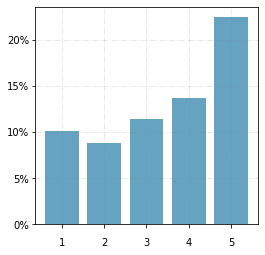

In [305]:

relative_frequencies_sum = relative_frequencies.sum(axis=1)/4
height = relative_frequencies_sum

bars = ('1', '2', '3', '4', '5')


# Figure Size
fig, ax= plt.subplots(figsize =(4, 4))


# Horizontal Bar Plot
ax.bar(bars, height,color=(0.0, 0.4, 0.6, 0.6))
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.9,
        alpha = 0.2)

    # Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 10)
ax.yaxis.set_tick_params(pad = 2)

vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])


plt.show()

In [306]:
height

1.0    0.101295
2.0    0.088729
3.0    0.114794
4.0    0.137127
5.0    0.224722
dtype: float64

In [307]:
glass_ceiling.describe()

,"1. Έχετε αισθανθεί ποτέ ότι υπάρχει ένα εμπόδιο που σας εμποδίζει να προχωρήσετε στις υψηλόβαθμες θέσεις στον εργασιακό σας χώρο με βάση παράγοντες όπως το φύλο; (π.χ. μητρότητα/πατρότητα, μυϊκή δύναμη κτλ.)",2. Πιστεύετε ότι ο χώρος εργασίας σας έχει μια ηγετική ομάδα που αντιπροσωπεύει διαφορετικά φύλα και υπόβαθρα;,3. Πιστεύετε ότι ο χώρος εργασίας σας έχει δίκαιες και διαφανείς διαδικασίες πρόσληψης και προαγωγής που είναι απαλλαγμένες από διακρίσεις που αφορούν στο φύλο;,4. Πιστεύετε ότι υπάρχει το φαινόμενο της γυάλινης οροφής (Glass Ceiling) στον κλάδο ή τον χώρο εργασίας σας;
count,68.000000,68.000000,67.000000,67.000000
mean,3.823529,3.264706,3.552239,3.268657
std,1.836131,1.265119,1.234401,1.996832
min,1.000000,1.000000,1.000000,1.000000
25%,1.000000,2.000000,3.000000,1.000000
50%,5.000000,3.000000,4.000000,5.000000
75%,5.000000,4.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000


In [308]:
parameter = glass_ceiling

individualScore = parameter.sum(axis=1)/4

In [309]:
gender = pd.concat([data['1. Φύλο:'],individualScore],axis=1)
gender.columns = ['Gender','Score']

In [310]:
from statistics import mean, pvariance

male = []
female = []

#create table for every category
for index, row in gender.iterrows(): 
    if row['Gender'] == 'Γυναίκα':
        female.append(row['Score'])
    else:
        male.append(row['Score'])
        

avg1 = mean(male)
var1 = pvariance(male)
avg2 = mean(female)
var2 = pvariance(female)

print("avg male =", avg1,"var male =",var1,"avg female =", avg2,"var female =",var2 )

avg male = 3.590909090909091 var male = 0.6735537190082644 avg female = 3.385869565217391 var female = 0.8633329395085066


In [311]:
tStat, pValue = stats.ttest_ind(female, male, equal_var = False) #run independent sample T-Test
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat)) #print the

P-Value:0.36985376434131556 T-Statistic:-0.9056321531655456


In [312]:
from statistics import mean, pvariance

no = []
yes = []

#create table for every category
for index, row in provider.iterrows(): 
    if row['Provider'] == 'Ναι':
        yes.append(row['Score'])
    else:
        no.append(row['Score'])
        
avg1 = mean(yes)
var1 = pvariance(yes)
avg2 = mean(no)
var2 = pvariance(no)

print("avg provider =", avg1,"var provider =",var1,"avg no =", avg2,"var no =",var2 )

avg provider = 3.732142857142857 var provider = 1.0487882653061225 avg no = 3.814814814814815 var no = 0.687928669410151


In [313]:
tStat, pValue = stats.ttest_ind(yes, no, equal_var = False) #run independent sample T-Test
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat)) #print the

P-Value:0.7902279205221685 T-Statistic:-0.2701412266254635


### Parameter 3 Gender Descrimination

In [314]:
relative_frequencies = gender_descrimination.apply(lambda x: x.value_counts(normalize=True))

relative_frequencies[q9].iloc[0] = relative_frequencies[q9].iloc[0]/3
relative_frequencies[q9].iloc[4] = relative_frequencies[q9].iloc[4]/3

relative_frequencies[q12].iloc[0] = relative_frequencies[q12].iloc[0]/3
relative_frequencies[q12].iloc[4] = relative_frequencies[q12].iloc[4]/3



/var/folders/q9/jvtr2p8s6sn6wt933mh1tyfm0000gn/T/ipykernel_70747/4204398965.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])


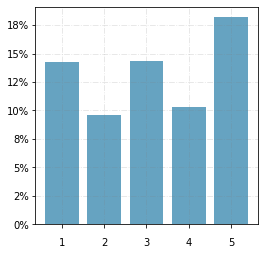

In [315]:
relative_frequencies_sum = relative_frequencies.sum(axis=1)/4
height = relative_frequencies_sum

bars = ('1', '2', '3', '4', '5')


# Figure Size
fig, ax= plt.subplots(figsize =(4, 4))


# Horizontal Bar Plot
ax.bar(bars, height,color=(0.0, 0.4, 0.6, 0.6))
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.9,
        alpha = 0.2)

    # Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 10)
ax.yaxis.set_tick_params(pad = 2)

vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])


plt.show()

In [316]:
height

1.0    0.142852
2.0    0.095588
3.0    0.143382
4.0    0.102941
5.0    0.181903
dtype: float64

In [317]:
gender_descrimination.describe()

,1. Έχετε βιώσει ποτέ στερεοτυπικά σχόλια αναφορικά με το φύλο σας στον χώρο εργασίας;,2. Έχετε αισθανθεί ποτέ ότι στερεότυπα για το φύλο επηρεάζουν κάποιον άλλο στο χώρο εργασίας;,3. Πιστεύετε ότι τα στερεότυπα των φύλων έχουν επηρεάσει τις ευκαιρίες επαγγελματικής σας εξέλιξης ή τις αναθέσεις εργασίας σας;,4. Έχετε υποστεί ποτέ παρενόχληση ή διάκριση με βάση τα στερεότυπα του φύλου στο χώρο εργασίας;
count,67.000000,68.000000,68.000000,68.000000
mean,2.731343,2.720588,3.397059,3.941176
std,1.996832,1.255978,1.247561,1.777827
min,1.000000,1.000000,1.000000,1.000000
25%,1.000000,2.000000,3.000000,1.000000
50%,1.000000,3.000000,3.000000,5.000000
75%,5.000000,4.000000,4.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000


In [318]:
parameter = gender_descrimination

individualScore = parameter.sum(axis=1)/4

In [319]:
gender = pd.concat([data['1. Φύλο:'],individualScore],axis=1)
gender.columns = ['Gender','Score']

In [320]:
from statistics import mean, pvariance

male = []
female = []

#create table for every category
for index, row in gender.iterrows(): 
    if row['Gender'] == 'Γυναίκα':
        female.append(row['Score'])
    else:
        male.append(row['Score'])
        

avg1 = mean(male)
var1 = pvariance(male)
avg2 = mean(female)
var2 = pvariance(female)

print("avg male =", avg1,"var male =",var1,"avg female =", avg2,"var female =",var2 )

avg male = 3.4204545454545454 var male = 1.2976497933884297 avg female = 3.0760869565217392 var female = 1.1545368620037808


In [321]:
tStat, pValue = stats.ttest_ind(female, male, equal_var = False) #run independent sample T-Test
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat)) #print the

P-Value:0.25130357201552084 T-Statistic:-1.1645128758982153


In [322]:
from statistics import mean, pvariance

no = []
yes = []

#create table for every category
for index, row in provider.iterrows(): 
    if row['Provider'] == 'Ναι':
        yes.append(row['Score'])
    else:
        no.append(row['Score'])
        
avg1 = mean(yes)
var1 = pvariance(yes)
avg2 = mean(no)
var2 = pvariance(no)

print("avg provider =", avg1,"var provider =",var1,"avg no =", avg2,"var no =",var2 )

avg provider = 3.732142857142857 var provider = 1.0487882653061225 avg no = 3.814814814814815 var no = 0.687928669410151


In [323]:
tStat, pValue = stats.ttest_ind(yes, no, equal_var = False) #run independent sample T-Test
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat)) #print the

P-Value:0.7902279205221685 T-Statistic:-0.2701412266254635


### Parameter 4 Descrimination in Recruitment

In [324]:


relative_frequencies = descrimination_recruitment.apply(lambda x: x.value_counts(normalize=True))

relative_frequencies[q13].iloc[0] = relative_frequencies[q13].iloc[0]/3
relative_frequencies[q13].iloc[4] = relative_frequencies[q13].iloc[4]/3

relative_frequencies[q16].iloc[0] = relative_frequencies[q16].iloc[0]/3
relative_frequencies[q16].iloc[4] = relative_frequencies[q16].iloc[4]/3

/var/folders/q9/jvtr2p8s6sn6wt933mh1tyfm0000gn/T/ipykernel_70747/4204398965.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])


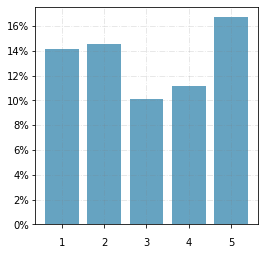

In [325]:
relative_frequencies_sum = relative_frequencies.sum(axis=1)/4
height = relative_frequencies_sum

bars = ('1', '2', '3', '4', '5')


# Figure Size
fig, ax= plt.subplots(figsize =(4, 4))


# Horizontal Bar Plot
ax.bar(bars, height,color=(0.0, 0.4, 0.6, 0.6))
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.9,
        alpha = 0.2)

    # Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 10)
ax.yaxis.set_tick_params(pad = 2)

vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])


plt.show()

In [326]:
height

1.0    0.141407
2.0    0.145522
3.0    0.100746
4.0    0.111940
5.0    0.167051
dtype: float64

In [327]:
descrimination_recruitment.describe()

,1. Έχετε αισθανθεί ποτέ αδικία ή διάκριση κατά τη διαδικασία πρόσληψης βάση παραγόντων όπως το φύλο;,2. Έχει υποπέσει ποτέ στην αντίληψη σας ότι κάποιος υφίσταται αδικία ή διάκριση κατά τη διάρκεια της διαδικασίας πρόσληψης λόγω φύλου;,3. Πιστεύετε ότι υπάρχουν προκαταλήψεις στη διαδικασία πρόσληψης που πλήττουν ορισμένες ομάδες ανθρώπων;,4. Σας έχουν κάνει ποτέ ακατάλληλες ή αδιάκριτες ερωτήσεις κατά τη διάρκεια μιας συνέντευξης για δουλειά;
count,68.000000,67.000000,67.000000,67.000000
mean,3.764706,3.149254,2.298507,4.104478
std,1.861773,1.258351,1.114844,1.679956
min,1.000000,1.000000,1.000000,1.000000
25%,1.000000,2.000000,1.000000,5.000000
50%,5.000000,3.000000,2.000000,5.000000
75%,5.000000,4.000000,3.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000


In [328]:
parameter = descrimination_recruitment

individualScore = parameter.sum(axis=1)/4

In [329]:
gender = pd.concat([data['1. Φύλο:'],individualScore],axis=1)
gender.columns = ['Gender','Score']

In [330]:
from statistics import mean, pvariance

male = []
female = []

#create table for every category
for index, row in gender.iterrows(): 
    if row['Gender'] == 'Γυναίκα':
        female.append(row['Score'])
    else:
        male.append(row['Score'])
        

avg1 = mean(male)
var1 = pvariance(male)
avg2 = mean(female)
var2 = pvariance(female)

print("avg male =", avg1,"var male =",var1,"avg female =", avg2,"var female =",var2 )

avg male = 3.5 var male = 0.6534090909090909 avg female = 3.1956521739130435 var female = 1.0812854442344044


In [331]:
tStat, pValue = stats.ttest_ind(female, male, equal_var = False) #run independent sample T-Test
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat)) #print the

P-Value:0.2007234641278235 T-Statistic:-1.2960563689947668


In [332]:
from statistics import mean, pvariance

no = []
yes = []

#create table for every category
for index, row in provider.iterrows(): 
    if row['Provider'] == 'Ναι':
        yes.append(row['Score'])
    else:
        no.append(row['Score'])
        
avg1 = mean(yes)
var1 = pvariance(yes)
avg2 = mean(no)
var2 = pvariance(no)

print("avg provider =", avg1,"var provider =",var1,"avg no =", avg2,"var no =",var2 )

avg provider = 3.732142857142857 var provider = 1.0487882653061225 avg no = 3.814814814814815 var no = 0.687928669410151


In [333]:
tStat, pValue = stats.ttest_ind(yes, no, equal_var = False) #run independent sample T-Test
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat)) #print the

P-Value:0.7902279205221685 T-Statistic:-0.2701412266254635
